# Optimization Using Newton's Method and Bisection

First import some libraries we'll need for plotting and numerical calculations.

In [1]:
# Import some needed libraries
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt

Let's start by defining the function for a parabola and creating an array of values to calculate the parabola curve.

In [11]:
# Make an array of 1000 numbers evenly
# spaced from 0 to 10, inclusive.
x = np.linspace(0, 10, num=1000)
# Calculate the parabola which opens upwards
def f(t):
    return t**2 - 10.0*t + 27.25
y = f(x)

And now we'll plot the parabola.

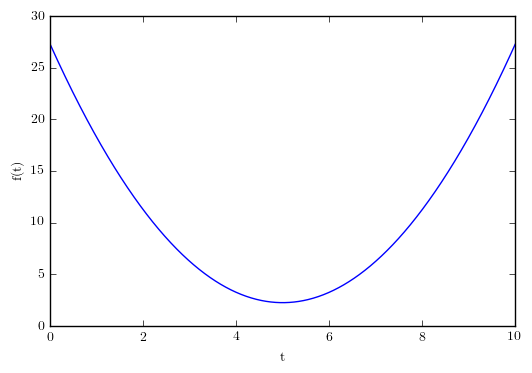

In [23]:
# Plot the parabola
plt.plot(x,y)
plt.ylim([0,30]) # Sets vertical range of plot
plt.xlabel('t')
plt.ylabel('f(t)')

## Minimization using Newton's Method

Suppose we wanted to know what and where the minimum value of $f(t)$ is.

Newton's method uses the derivative of $f'(t)$ to minimize $f(t)$ as follows.

In [15]:
def fprime(t):
    # Derivative df/dt
    return 2*t - 10.0

Let's start by guessing that the minimum value of $f(t)$ occurs at $t=2$. It's obvious from the above plot that isn't true, but this will demonstrate how Newton's method gets us from the incorrect initial guess to the actual minimum. That method will work for more complicated functions where we can't find the minimum analytically.

In [16]:
# Start with t = 2
t0 = 2
f0 = f(t0)
print('f(2) = {}'.format(f0))
fp0 = fprime(t0)
print('f\'(2) = {}'.format(fp0))

f(2) = 11.25
f'(2) = -6.0


Now, let's mark the point $(2, f(2))$ on our plot and also draw the tangent line to $f(t)$ at that point. The tangent line is the line passing through $(2, f(2))$ with the slope $f'(2)$.

The equation of the tangent line passing through $(t_0, f(t_0))$ with slope $f'(t_0)$ is then:

\begin{equation}
f_{tan}(t) = f'(t_0) \cdot t + (f(t_0) - f'(t_0) \cdot t_0)
\end{equation}

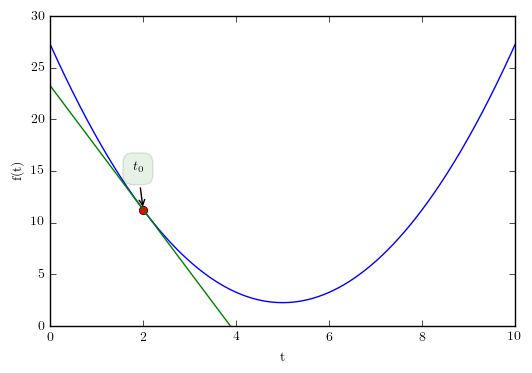

In [64]:
def tangentline(x, point, slope):
    # Given a point [x0, y0] and slope
    # defining a line y = a*x+b,
    # calculate a and b and return y(x).
    # x can be a single value or an array.
    a = slope
    # b = y - a*x = y0 - a*x0
    b = point[1] - a*point[0]
    return a*x + b

def point_annotate(x, y, txt):
    plt.annotate(txt, xy=(x, y), xytext=(0, 25), 
        textcoords='offset points', ha='right', 
        va='bottom',
        bbox=dict(boxstyle='round,pad=0.7', 
                    fc='green', alpha=0.1),
                    arrowprops=dict(arrowstyle = '->', 
                    connectionstyle='arc3,rad=0'))

# Plot the parabola
plt.plot(x,y)
# Plot the point (2, f(2))
plt.plot(t0, f0, marker='o', color='red')
# Annotate point
point_annotate(t0, f0, '$t_0$')
# Plot the tangent line at (2, f(2))
ftan = tangentline(x, [t0, f0], fp0)
plt.plot(x, ftan, color='green')
plt.ylim([0,30])
plt.xlabel('t')
plt.ylabel('f(t)')

Notice above that the value of $t$ where the green tangent line intersects the horizontal axis $f(t) = 0$ is a lot closer to where we see the minimum value of $f(t)$ really is.

So we'll use that value of $t$ as our next guess $t_1$ and the first thing to do is find out what that value is.

Remember the equation for the tangent line through $(t_0 , f(t_0))$ is:

\begin{equation}
f_{tan}(t) = f'(t_0) \cdot t + (f(t_0) - f'(t_0) \cdot t_0)
\end{equation}

So its "x-intercept" will be $t_1$, which we can find as follows:

\begin{align}
f_{tan}(t_1) = 0 &= f'(t_0) \cdot t_1 + (f(t_0) - f'(t_0) \cdot t_0) \\
- (f(t_0) - f'(t_0) \cdot t_0) &= f'(t_0) \cdot t_1 \\
- \dfrac{(f(t_0) - f'(t_0) \cdot t_0)}{f'(t_0)} &= t_1 \\
t_0 - \dfrac{f(t_0)}{f'(t_0)} &= t_1
\end{align}

In [65]:
# Make a function to calculate the x-intercept.
def getxintercept(t, f, fprime):
    # Given (t, f) which line on a line with 
    # slope fprime, find the horizontal intercept
    return t - f/fprime

# Calculate t1
t1 = getxintercept(t0, f0, fp0)
print('Found t1 = {}'.format(t1))

Found t1 = 3.875


Now let's do another Newton iteration starting at $t_1$:

In [66]:
f1 = f(t1)
print('f({}) = {}'.format(t1, f1))
fp1 = fprime(t1)
print('f\'({}) = {}'.format(t1, fp1))

f(3.875) = 3.515625
f'(3.875) = -2.25


And we can plot our progress as below:

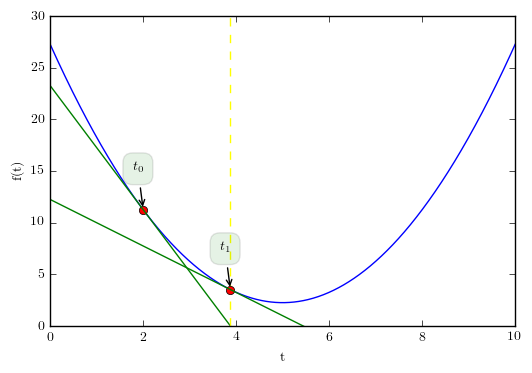

In [67]:
# Plot the parabola
plt.plot(x,y)
# Plot the point (t0, f(t0))
plt.plot(t0, f0, marker='o', color='red')
# Plot the tangent line at (t0, f(t0))
ftan = tangentline(x, [t0, f0], fp0)
plt.plot(x, ftan, color='green')
# Plot a vertical line at t1
plt.axvline(x=t1, color='yellow', linestyle='--')
# Plot the point (t1, f(t1))
plt.plot(t1, f1, marker='o', color='red')
# Plot the tangent line at (t1, f(t1))
ftan = tangentline(x, [t1, f1], fp1)
plt.plot(x, ftan, color='green')
# Annotate points
point_annotate(t0, f0, '$t_0$')
point_annotate(t1, f1, '$t_1$')
plt.ylim([0,30])
plt.xlabel('t')
plt.ylabel('f(t)')

We're getting closer to the minimum of $f(t)$ so let's see what another iteration will get us.

Found t2 = 5.4375
f(5.4375) = 2.44140625
f'(5.4375) = 0.875


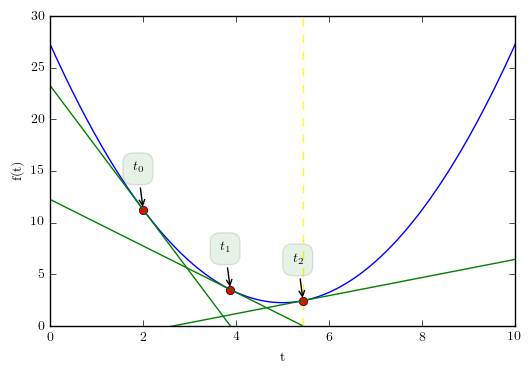

In [68]:
# Calculate t2
t2 = getxintercept(t1, f1, fp1)
print('Found t2 = {}'.format(t2))
f2 = f(t2)
print('f({}) = {}'.format(t2, f2))
fp2 = fprime(t2)
print('f\'({}) = {}'.format(t2, fp2))

# Plot the parabola
plt.plot(x,y)
# Plot the point (t0, f(t0))
plt.plot(t0, f0, marker='o', color='red')
# Plot the tangent line at (t0, f(t0))
ftan = tangentline(x, [t0, f0], fp0)
plt.plot(x, ftan, color='green')
# Plot the point (t1, f(t1))
plt.plot(t1, f1, marker='o', color='red')
# Plot the tangent line at (t1, f(t1))
ftan = tangentline(x, [t1, f1], fp1)
plt.plot(x, ftan, color='green')
# Plot a vertical line at t2
plt.axvline(x=t2, color='yellow', linestyle='--')
# Plot the point (t2, f(t2))
plt.plot(t2, f2, marker='o', color='red')
# Plot the tangent line at (t2, f(t2))
ftan = tangentline(x, [t2, f2], fp2)
plt.plot(x, ftan, color='green')
# Annotate points
point_annotate(t0, f0, '$t_0$')
point_annotate(t1, f1, '$t_1$')
point_annotate(t2, f2, '$t_2$')
plt.ylim([0,30])
plt.xlabel('t')
plt.ylabel('f(t)')

Now, our second iteration found the third red point above at $t_2$. Notice that if we follow the tangent line at $t_2$ back to the t-intercept, that will get us further away from the minimum, near where we started!

However, we've found something useful here. Notice the tangent slopes at $t_0$ and $t_1$ are negative but the slope of the tangent line at $t_2$ is positive. That indicates the true minimum lies somewhere between $t_1$ and $t_2$ where the derivative $f'(t_{min}) = 0$.

## Refining By Bisection

Because we have an upper and lower bound on the minimum, we can refine our estimate of the location for the minimum by bisecting this range, testing the derivative $f'(t)$ until we get as close as we like to the minimum. Let's zoom in here and see how this works.

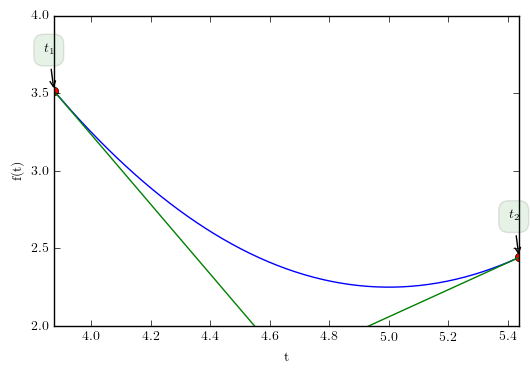

In [69]:
# Plot the parabola
plt.plot(x,y)
# Plot the point (t1, f(t1))
plt.plot(t1, f1, marker='o', color='red')
# Plot the tangent line at (t1, f(t1))
ftan = tangentline(x, [t1, f1], fp1)
plt.plot(x, ftan, color='green')
# Plot the point (t2, f(t2))
plt.plot(t2, f2, marker='o', color='red')
# Plot the tangent line at (t2, f(t2))
ftan = tangentline(x, [t2, f2], fp2)
plt.plot(x, ftan, color='green')
point_annotate(t1, f1, '$t_1$')
point_annotate(t2, f2, '$t_2$')
plt.xlim([t1,t2])
plt.ylim([2, 4])
plt.xlabel('t')
plt.ylabel('f(t)')

Now bisect the interval $[t_1, t_2]$ by calculating $t_3 = \dfrac{t_1 + t_2}{2}$ and determine whether it should replace the bound $t_1$ or $t_2$ by checking the sign of $f'(t_3)$:

In [70]:
def dobisect(a, b):
    return 0.5*(a+b)

t3 = dobisect(t1, t2)
print('Found t3 = {}'.format(t3))
f3 = f(t3)
print('f({}) = {}'.format(t3, f3))
fp3 = fprime(t3)
print('f\'({}) = {}'.format(t3, fp3))

Found t3 = 4.65625
f(4.65625) = 2.3681640625
f'(4.65625) = -0.6875


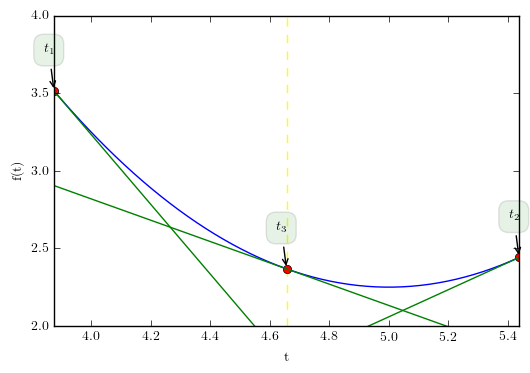

In [72]:
# Plot the parabola
plt.plot(x,y)
# Plot the point (t1, f(t1))
plt.plot(t1, f1, marker='o', color='red')
# Plot the tangent line at (t1, f(t1))
ftan = tangentline(x, [t1, f1], fp1)
plt.plot(x, ftan, color='green')
# Plot the point (t2, f(t2))
plt.plot(t2, f2, marker='o', color='red')
# Plot the tangent line at (t2, f(t2))
ftan = tangentline(x, [t2, f2], fp2)
plt.plot(x, ftan, color='green')
# Plot vertical line at t3
plt.axvline(x=t3, color='yellow', linestyle='--')
# Plot the point (t3, f(t3))
plt.plot(t3, f3, marker='o', color='red')
# Plot the tangent line at (t3, f(t3))
ftan = tangentline(x, [t3, f3], fp3)
plt.plot(x, ftan, color='green')
# Annotate points
point_annotate(t1, f1, '$t_1$')
point_annotate(t2, f2, '$t_2$')
point_annotate(t3, f3, '$t_3$')
plt.xlim([t1,t2])
plt.ylim([2, 4])
plt.xlabel('t')
plt.ylabel('f(t)')

So we see that $f'(t_3) < 0$ and we can replace $t_1$ as the left bound with $t_3$. We can repeat this procedure to find a series of new $t_n$ by bisection until $\left|f(t_{n}) - f(t_{n-1})\right| < \epsilon$ to whatever tolerance $\epsilon$ we desire.

In [74]:
# We want to know the minimum of f(t) 
# to a tolerance of 1e-3
# starting with the interval [t3, t2]
epsilon = 1.0e-3
frhs = f2
trhs = t2
flhs = f3
tlhs = t3
fold = f2
fnew = f3
neval = 0
while(abs(fnew-fold) > epsilon):
    # Find t for the next step
    tnew = 0.5*(tlhs+trhs)
    # Find the value of f(tnew) and f'(tnew)
    fnew = f(tnew)
    fpnew = fprime(tnew)
    neval += 1
    if fpnew == 0:
        # We've found the minimum
        break
    elif fpnew > 0:
        # The slope of the new point is positive
        # so replace the right hand side of
        # the interval.
        trhs = tnew
        frhs = fnew
    else:
        # The slope of the new point is negative
        # so replace the left hand side of
        # the interval.
        tlhs = tnew
        flhs = fnew

# Print the result we found for the minimum
print('Found minimum value of f(t) to tolerance {}'.format(epsilon))
print('Miminum f(t) = {}'.format(fnew))
print('f(t) minimum at t = {}'.format(tnew))
print('Number of evaluations of f(t): {}'.format(neval))

Found minimum value of f(t) to tolerance 0.001
Miminum f(t) = 2.25
f(t) minimum at t = 5.0
Number of evaluations of f(t): 49


The bisection algorithm we implemented found the minimum pretty fast, with not very many function evaluations. And indeed, the equation for $f(t)$ is as follows:

\begin{align}
f(t) &= t^2 - 10.0 \cdot t + 27.25 \\
f(t) &= (t-5)^2 + 2.25
\end{align}

For bisection to work, you have to be able to "bracket" the minimum of $f(t)$, which is why it is useful to do Newton iteration first until we find a pair of closely spaced values of $t$ where $f'(t)$ changes sign. As we have seen above, of course, Newton iteration will get you close to the minimum with just a few function evaluations, but it will become very inefficient near the minimum where $f'(t) \approx 0$, which causes large displacements in calculating the next $t_n$.

Note also that calculating the "x-intercept" in the Newton step assumes that $f_{min} \ge 0$. If that is not the case, it is possible to use the above algorithm as shown simply by increasing $f(t)$ by a constant $K$ such that the expected minimum is greater than $0$. Plotting $f(t)$ in advance can be helpful here.

Note also that if one desires to maximize the value of $f(t)$ in some region, we can apply the inversion $f(t) \rightarrow -f(t)$ and then perform the steps above to find the minimum of $-f(t)$. These procedures will allow one to find local extrema of whatever analytic function is desired.

If you wish to optimize a non-analytic function, such as might come from a complicated "black-box" algorithm where it is not possible to calculate the derivative $f'(t)$ then you can always compute $f'(t)$ numerically using a very small step size $\delta t$ as follows. The step $\delta t$ should be much smaller than the distance between each Newton guess $t_n$ and the true minimum $t_{min}$ for the numerical derivatives to be good enough.

\begin{equation}
f'(t) \approx \dfrac{f(t + \delta t) - f(t)}{\delta t}
\end{equation}

## Minimization with SciPy Algorithms

SciPy offers many advanced minimization algorithms for different kinds of scalar functions of 1 or more variables which build on these ideas. For a list of algorithms, see https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

Following is an example of function minimization using the BFGS algorithm by Broyden, Fletcher, Goldfarb, and Shanno. It uses the first derivative in a similar fashion to Newton's method, computed numerically, and the BFGS method works well for non-smooth functions.

For a description of the algorithm see https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm

In [81]:
from scipy.optimize import minimize
t0 = 2 # Start with a guess of t = 2
# Minimize function f starting with the guess of t0
# Use the BFGS method
# Minimize f to a tolerance of 1e-6
# Display the optimization data
result = minimize(f, t0, method='BFGS', tol=1e-6, 
                  options={'disp':True})
print('Function minimum found at t = {}'.format(result.x))

Optimization terminated successfully.
         Current function value: 2.250000
         Iterations: 2
         Function evaluations: 9
         Gradient evaluations: 3
Function minimum found at t = [ 5.00000003]
